# Tilraun með greiningu á Titanic datasett-inu
### Fengið héðan https://deepnote.com/@aayushi-jain/Working-with-Pandas-Titanic-Dataset-bcd53e2d-b6f8-4491-8eb9-59f7b8b6dfa8

Importing relevant libraries

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Loading dataset

In [19]:
# load dataset titanic
df = sns.load_dataset('titanic')

From the given dataset print the first and last five rows.

In [20]:
#printing first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
#printing last 5 rows
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Clean the dataset and update the CSV file.

In [22]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [24]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
#to check if all values of pclass and class column matches with each other
first=np.argwhere((df['pclass'].to_numpy()==1) & (df['class'].to_numpy() != 'First')).shape[0]
second= np.argwhere((df['pclass'].to_numpy()==2) & (df['class'].to_numpy() != 'Second')).shape[0]
third= np.argwhere((df['pclass'].to_numpy()==3) & (df['class'].to_numpy() != 'Third')).shape[0]
print("first: %d, second: %d, third: %d" %(first, second,third))

first: 0, second: 0, third: 0


In [26]:
#since plass and class column values gives the same info, we can drop one of them
df=df.drop('pclass',axis= 1)

In [27]:
#to check if the missing values for embark and embarked column are for the same person,
# otherwise both columns could be filled based on the other column's value
df['embarked'][(df['embarked'].isnull()) & (df['embark_town'].isnull())]

61     NaN
829    NaN
Name: embarked, dtype: object

In [28]:
#to check all values of embarked and embark_towns column matches with each other
S=np.argwhere((df['embarked'].to_numpy()=='S') & (df['embark_town'].to_numpy() != 'Southampton')).shape[0]
C= np.argwhere((df['embarked'].to_numpy()=='C') & (df['embark_town'].to_numpy() != 'Cherbourg')).shape[0]
Q= np.argwhere((df['embarked'].to_numpy()=='Q') & (df['embark_town'].to_numpy() != 'Queenstown')).shape[0]
print("S: %d, C: %d, Q: %d" %(S, C,Q))

S: 0, C: 0, Q: 0


In [29]:
#since embarked and embark_town column values gives the same info, we can drop one of them
df=df.drop('embarked',axis= 1)

In [30]:
#to crosscheck the data is correct in survived column by crosschecking it withp alive column.
df['survived'][(df['survived']==1) & (df['alive']=='no')]

Series([], Name: survived, dtype: int64)

In [31]:
#drooping alive clumn as survived provided the same info
df= df.drop('alive', axis=1)

In [32]:
#to check if there are any missing values for age of a child so that they could be filled appropriately
df['age'][(df['age'].isnull()) & (df['who']=='child')]

Series([], Name: age, dtype: float64)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


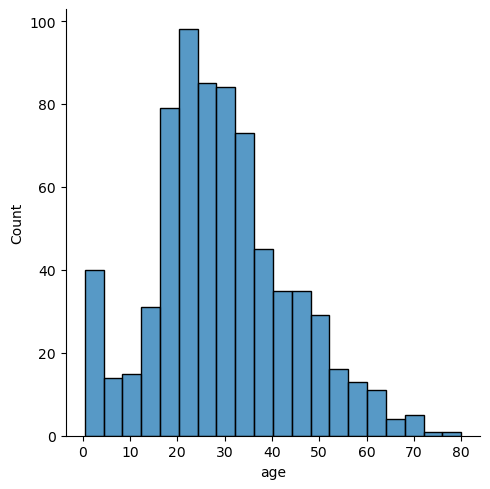

In [33]:
#no missing values for age of a child, now look at distplot of age
sns.displot(df['age'])

In [34]:
#The distplot of age is approximately normal, so it would be approriate to fill the missing values with mean
df['age']=df['age'].fillna(df['age'].mean())

In [35]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Find the highest fare.

In [36]:
#printing highest fare
df['fare'].max()

512.3292

Print all survivors details.

In [37]:
#printing all survivor's details
survivors_details=df[df['survived']==1]
survivors_details

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,False
8,1,female,27.0,0,2,11.1333,Third,woman,False,NaN,Southampton,False
9,1,female,14.0,1,0,30.0708,Second,child,False,NaN,Cherbourg,False
...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,female,15.0,0,0,7.2250,Third,child,False,NaN,Cherbourg,True
879,1,female,56.0,0,1,83.1583,First,woman,False,C,Cherbourg,False
880,1,female,25.0,0,1,26.0000,Second,woman,False,NaN,Southampton,False
887,1,female,19.0,0,0,30.0000,First,woman,False,B,Southampton,True


Count total passengers per class.

In [38]:
#printing total passengers per class.
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

Find each class highest fare.

In [39]:
#to find each class's highest fare
df.groupby('class')['fare'].max()

class
First     512.3292
Second     73.5000
Third      69.5500
Name: fare, dtype: float64

Find the average age of passengers by class.

In [40]:
#to find average age of passengers by class
df.groupby('class')['age'].mean()

class
First     37.048118
Second    29.866958
Third     26.403259
Name: age, dtype: float64

Sort all passengers by fare and age columns.

In [41]:
#sorting passengers by fare and age
df=df.sort_values(by=['fare','age'])
df

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
302,0,male,19.000000,0,0,0.0000,Third,man,True,NaN,Southampton,True
271,1,male,25.000000,0,0,0.0000,Third,man,True,NaN,Southampton,True
277,0,male,29.699118,0,0,0.0000,Second,man,True,NaN,Southampton,True
413,0,male,29.699118,0,0,0.0000,Second,man,True,NaN,Southampton,True
466,0,male,29.699118,0,0,0.0000,Second,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
341,1,female,24.000000,3,2,263.0000,First,woman,False,C,Southampton,False
438,0,male,64.000000,1,4,263.0000,First,man,True,C,Southampton,False
258,1,female,35.000000,0,0,512.3292,First,woman,False,NaN,Cherbourg,True
737,1,male,35.000000,0,0,512.3292,First,man,True,B,Cherbourg,True
